In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from collections import Counter
import scipy.sparse as sparse
from sklearn.ensemble import RandomForestClassifier
import os
#filepath = 'C:/Users/I008328/Desktop/AIA/Next Recommended Actions/'
filepath = "C:/Users/Wai\OneDrive/Desktop/insurance/"
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#pd.set_option('display.max_columns', None)

In [3]:
df_inc.drop_duplicates(subset='INS_ID',keep='first',inplace=True, ignore_index=True)
df_inc.shape

(2322767, 3)

In [4]:
df = df.drop(df[(df.FLG_SUM == 1) & (df.FLG_POL_ANNIVERSARY_1M == 'Y') &(df.TARGET_REPUR_IND == 0)].index)
df.shape

(259511, 68)

In [5]:
df = df.drop(df[(df.FLG_SUM == 1) & (df.FLG_BIRTHDAY == 'Y') &(df.TARGET_REPUR_IND == 0)].index)
df.shape

(137938, 68)

In [6]:
df = df.drop(df[(df.INS_AGE > 20) & (df.FLG_21 == 'Y')].index)
df.shape

(137856, 68)

### Start Here

In [3]:
df = pd.read_csv('C:/Users/Wai\OneDrive/Desktop/insurance/cust360_sep_cleaned.csv')
df.shape

C:\Users\Wai\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(144734, 86)

In [3]:
df.columns

Index(['REF_DT_flag', 'CUSTOMER_UNIQUE_ID', 'COMMON_IC', 'SERVICING_AGENT_CD',
       'SCV_ID', 'CUSTOMER_ROLE', 'INFORCE_IND', 'NO_OF_CHILD',
       'FLG_REPURCHASE_YTD', 'REPURCHASE_LIKELIHOOD', 'LAPSE_LIKELIHOOD',
       'AD_CONV_LIKELIHOOD', 'FLG_POL_ANNIVERSARY', 'FLG_NON_ACUTE_CLM',
       'FLG_NON_ACUTE_CLM_AMT', 'FLG_ACUTE_CLM', 'FLG_ACUTE_CLM_AMT',
       'FLG_ACC_CLM', 'FLG_ACC_CLM_AMT', 'FLG_NON_ACUTE_CLM_FAM',
       'FLG_NON_ACUTE_CLM_AMT_FAM', 'FLG_ACUTE_CLM_FAM',
       'FLG_ACUTE_CLM_AMT_FAM', 'FLG_ACC_CLM_FAM', 'FLG_ACC_CLM_AMT_FAM',
       'FLG_CALL_POSITIVE', 'FLG_CALL_NEGATIVE', 'MYAIA_REGISTRATION_IND',
       'FHC_COMPLETION_IND', 'FLG_PPT', 'FLG_AGE_21', 'FLG_MARRIED',
       'FLG_LIFE_STAGE', 'FLG_CHILD', 'FLG_INCOME_CHANGE', 'FLG_BIRTHDAY',
       'FLG_FHC_ANNUAL', 'FLG_CLM_TRIGGER', 'FLG_CLM_FAM_TRIGGER',
       'FLG_CALL_TRIGGER', 'FLG_MATURING', 'FLG_MATURED', 'FLG_SUM',
       'REPURCHASE_ANP', 'TARGET_REPUR_IND', 'INS_ID', 'REF_DT_pred',
       'INS_INCOME

In [8]:
df.INS_AGE.describe()

count    144351.000000
mean         40.687893
std          14.143228
min           2.000000
25%          30.000000
50%          40.000000
75%          51.000000
max          95.000000
Name: INS_AGE, dtype: float64

In [9]:
df.head()

,REF_DT_flag,CUSTOMER_UNIQUE_ID,COMMON_IC,SERVICING_AGENT_CD,SCV_ID,CUSTOMER_ROLE,INFORCE_IND,NO_OF_CHILD,FLG_REPURCHASE_YTD,REPURCHASE_LIKELIHOOD,...,INS_INT_EMAIL_3M,INS_INT_MYAIA_TRAN_3M,INS_IF_AGY_POL,INS_TENOR,INS_IF_CT,INS_IF_AP,INS_INT_MYAIA_TRAN_12M,INS_L_AGT_SEGM,INS_AGE,INS_LIFE_STAGE
0,2020-09-30,013231754342-19780608,13231754342,04CTBXPN,187555,BOTH,Y,4,N,-,...,0,4,0,229,6,9684,4,NLP,42.0,Established Family
1,2020-09-30,013234372759-19780605,13234372759,88499,528553,LF,Y,3,N,-,...,0,0,0,56,1,3840,0,More Than 600K,42.0,Mature Couple
2,2020-09-30,013234374499-19780605,13234374499,X7201,11869794,BOTH,Y,0,N,-,...,0,0,0,58,1,3000,0,Less Than 30K,42.0,Mature Couple
3,2020-09-30,013187374868-19780831,13187374868,K6027,4958003,BOTH,Y,0,N,-,...,0,0,0,254,2,3420,0,300K - 450K,42.0,Mature Couple
4,2020-09-30,013187374921-19780831,13187374921,8707Q,6604238,BOTH,Y,2,N,-,...,0,0,0,22,2,2128,0,150K - 300K,42.0,Nest Builder


In [3]:
df.INS_AGE.isnull().sum()

4

In [4]:
df = df[df.INS_AGE.notna()]
df = df[df.INS_AGE > 1]

In [155]:
#df_flags1.iloc[:,1:][df_flags1.iloc[:,1:] > 0] = 1
#df['INS_AGE'][df['INS_AGE'] < 0] = 0

In [4]:
df.INS_KID_CT.describe()

count    144351.000000
mean          1.139923
std           1.449933
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          20.000000
Name: INS_KID_CT, dtype: float64

In [5]:
# impute those with > 5 kids
mean = round(df["INS_KID_CT"].mean())
df["INS_KID_CT"] = np.where(df["INS_KID_CT"] >5, mean,df['INS_KID_CT'])

In [6]:
#df = df.drop(df[(df.INS_AGE >=21) & (df.FLG_21 == 'Y') ].index)
#df.shape

In [6]:
df.INS_L_AGT_SEGM.value_counts()

Less Than 30K     39747
30K - 80K         32948
150K - 300K       24292
80K - 150K        18688
300K - 450K       10443
More Than 600K     8537
450K - 600K        4855
NLP                4758
Name: INS_L_AGT_SEGM, dtype: int64

In [6]:
df['INS_L_AGT_SEGM'] = np.where(df['INS_L_AGT_SEGM'] == 'NLP',df['INS_L_AGT_SEGM'].mode()[0],df['INS_L_AGT_SEGM'])

In [8]:
df.INS_LIFE_STAGE.isnull().sum()

0

In [7]:
df_train = df.copy()

In [10]:
#from sklearn.utils import shuffle
#df_train = shuffle(df_train)

In [8]:
df_train.TARGET_REPUR_IND.value_counts()

0.0    130033
1.0     14318
Name: TARGET_REPUR_IND, dtype: int64

In [9]:
df_train.head()

,REF_DT_flag,CUSTOMER_UNIQUE_ID,COMMON_IC,SERVICING_AGENT_CD,SCV_ID,CUSTOMER_ROLE,INFORCE_IND,NO_OF_CHILD,FLG_REPURCHASE_YTD,REPURCHASE_LIKELIHOOD,...,INS_INT_EMAIL_3M,INS_INT_MYAIA_TRAN_3M,INS_IF_AGY_POL,INS_TENOR,INS_IF_CT,INS_IF_AP,INS_INT_MYAIA_TRAN_12M,INS_L_AGT_SEGM,INS_AGE,INS_LIFE_STAGE
0,2020-09-30,013231754342-19780608,13231754342,04CTBXPN,187555,BOTH,Y,4,N,-,...,0,4,0,229,6,9684,4,Less Than 30K,42.0,Established Family
1,2020-09-30,013234372759-19780605,13234372759,88499,528553,LF,Y,3,N,-,...,0,0,0,56,1,3840,0,More Than 600K,42.0,Mature Couple
2,2020-09-30,013234374499-19780605,13234374499,X7201,11869794,BOTH,Y,0,N,-,...,0,0,0,58,1,3000,0,Less Than 30K,42.0,Mature Couple
3,2020-09-30,013187374868-19780831,13187374868,K6027,4958003,BOTH,Y,0,N,-,...,0,0,0,254,2,3420,0,300K - 450K,42.0,Mature Couple
4,2020-09-30,013187374921-19780831,13187374921,8707Q,6604238,BOTH,Y,2,N,-,...,0,0,0,22,2,2128,0,150K - 300K,42.0,Nest Builder


In [36]:
#df_train['FLG_21'] = np.where((df_train.INS_AGE > 21) & (df_train['FLG_21'] =='Y'),df_train['FLG_21'] ='N',df_train['FLG_21']='Y')

In [10]:
df_flag1 = df_train[['FLG_AGE_21','FLG_MARRIED','FLG_LIFE_STAGE','FLG_CHILD','FLG_INCOME_CHANGE','FLG_BIRTHDAY','FLG_CLM_TRIGGER',
 'FLG_CLM_FAM_TRIGGER','FLG_CALL_TRIGGER','FLG_MATURING','FLG_MATURED','FLG_SUM' ,'TARGET_REPUR_IND']]
df_flag2 = df_train[['FLG_AGE_21','FLG_MARRIED','FLG_LIFE_STAGE','FLG_CHILD','FLG_INCOME_CHANGE','FLG_BIRTHDAY','FLG_CLM_TRIGGER',
 'FLG_CLM_FAM_TRIGGER','FLG_CALL_TRIGGER','FLG_MATURING','FLG_MATURED','FLG_SUM' ,'TARGET_REPUR_IND']]
df_flag1.head()

,FLG_AGE_21,FLG_MARRIED,FLG_LIFE_STAGE,FLG_CHILD,FLG_INCOME_CHANGE,FLG_BIRTHDAY,FLG_CLM_TRIGGER,FLG_CLM_FAM_TRIGGER,FLG_CALL_TRIGGER,FLG_MATURING,FLG_MATURED,FLG_SUM,TARGET_REPUR_IND
0,0,0,0,1,0,0,0,0,0,0,0,1,0.0
1,0,0,0,1,0,0,0,0,0,0,0,1,0.0
2,0,0,0,0,0,0,0,0,1,0,0,1,0.0
3,0,0,0,0,0,0,0,1,0,0,0,1,0.0
4,0,1,0,0,0,0,0,0,0,0,0,1,0.0


In [11]:
df1 = df_flag1.iloc[:,:-2].apply(pd.Series.value_counts).fillna(0)
df1

,FLG_AGE_21,FLG_MARRIED,FLG_LIFE_STAGE,FLG_CHILD,FLG_INCOME_CHANGE,FLG_BIRTHDAY,FLG_CLM_TRIGGER,FLG_CLM_FAM_TRIGGER,FLG_CALL_TRIGGER,FLG_MATURING,FLG_MATURED
0,137196,131084,106563,110259,126474,115466,140342,129954,111772,134321,140647
1,7155,13267,37788,34092,17877,28885,4009,14397,32579,10030,3704


<AxesSubplot:title={'center':'Total Number Of Each Flag'}>

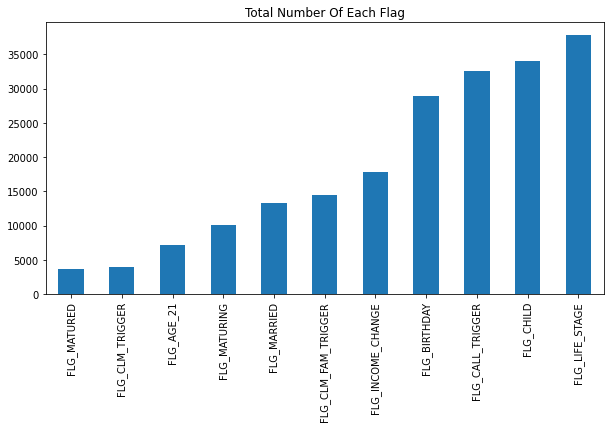

In [12]:
df1.loc[1].sort_values().plot(kind='bar',figsize=(10,5),title='Total Number Of Each Flag')

In [13]:
# Inverse of flags
list_inv = list(df1.loc[0]/df1.loc[1])
list_inv

[19.174842767295598,
 9.880455264943091,
 2.8200222292791364,
 3.2341605068637804,
 7.074676959221346,
 3.9974381166695516,
 35.00673484659516,
 9.026463846634716,
 3.4307989809386417,
 13.391924227318047,
 37.97165226781858]

In [14]:
# inv * repurchase rate
lst = ['FLG_AGE_21','FLG_MARRIED','FLG_LIFE_STAGE','FLG_CHILD','FLG_INCOME_CHANGE','FLG_BIRTHDAY','FLG_CLM_TRIGGER',
 'FLG_CLM_FAM_TRIGGER','FLG_CALL_TRIGGER','FLG_MATURING','FLG_MATURED']
lst1 = [0.0283,0.083,0.0447,0.0479,0.0653,0.0224,0.0261,0.0423,0.0373,0.0281,0.0355]
inv_flags = []
for k,v in zip(lst1,list_inv):
    inv_flags.append(k*v)
    #print(k*v)
print(inv_flags)

[0.5426480503144654, 0.8200777869902766, 0.1260549936487774, 0.15491628827877507, 0.4619764054371539, 0.08954261381339795, 0.9136757794961337, 0.38181942071264846, 0.12796880198901134, 0.3763130707876371, 1.3479936555075593]


In [15]:
for k,v in zip(lst,inv_flags):
    df_flag1[k] = df_flag1[k].apply(lambda x: v if x == 1 else 0)

<ipython-input-15-821a52567f9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag1[k] = df_flag1[k].apply(lambda x: v if x == 1 else 0)


In [16]:
interaction_inv = df_flag1[lst]
interaction_inv.head()

,FLG_AGE_21,FLG_MARRIED,FLG_LIFE_STAGE,FLG_CHILD,FLG_INCOME_CHANGE,FLG_BIRTHDAY,FLG_CLM_TRIGGER,FLG_CLM_FAM_TRIGGER,FLG_CALL_TRIGGER,FLG_MATURING,FLG_MATURED
0,0.0,0.000000,0.0,0.154916,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.154916,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.127969,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.381819,0.000000,0.0,0.0
4,0.0,0.820078,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [17]:
interaction_inv.max()

FLG_AGE_21             0.542648
FLG_MARRIED            0.820078
FLG_LIFE_STAGE         0.126055
FLG_CHILD              0.154916
FLG_INCOME_CHANGE      0.461976
FLG_BIRTHDAY           0.089543
FLG_CLM_TRIGGER        0.913676
FLG_CLM_FAM_TRIGGER    0.381819
FLG_CALL_TRIGGER       0.127969
FLG_MATURING           0.376313
FLG_MATURED            1.347994
dtype: float64

In [18]:
# Map Flags to their respective repurchase rate
lst = ['FLG_AGE_21','FLG_MARRIED','FLG_LIFE_STAGE','FLG_CHILD','FLG_INCOME_CHANGE','FLG_BIRTHDAY','FLG_CLM_TRIGGER',
 'FLG_CLM_FAM_TRIGGER','FLG_CALL_TRIGGER','FLG_MATURING','FLG_MATURED']
lst1 = [0.0283,0.083,0.0447,0.0479,0.0653,0.0224,0.0261,0.0423,0.0373,0.0281,0.0355]

In [19]:
# Populate flags columns with respective repurchase rate
for k,v in zip(lst,lst1):
    #df_train[k] = df_train[k].apply(lambda x: v if x == 1 else 0)
    df_flag2[k] = df_flag2[k].apply(lambda x: v if x > 0 else 0)
    

<ipython-input-19-910fb06fb4dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag2[k] = df_flag2[k].apply(lambda x: v if x > 0 else 0)


In [24]:
#df_train.to_csv('D://Users/I008328/NRA/data/df_train.csv',index=False)

In [110]:
#sanity check
print(df_train['FLG_MARRIED'].loc[df_train['FLG_MARRIED']>0].head(5))
print(df_train['FLG_MATURING'].loc[df_train['FLG_MATURING']>0].head(5))
print(df_train['FLG_CLM_TRIGGER'].loc[df_train['FLG_CLM_TRIGGER']>0].head(5))
print(df_train['FLG_CALL_TRIGGER'].loc[df_train['FLG_CALL_TRIGGER']>0].head(5))
print(df_train['FLG_AGE_21'].loc[df_train['FLG_AGE_21']>0].head(5))
print(df_train['FLG_BIRTHDAY'].loc[df_train['FLG_BIRTHDAY']>0].head(5))

4     0.083
10    0.083
18    0.083
22    0.083
29    0.083
Name: FLG_MARRIED, dtype: float64
16    0.0281
17    0.0281
24    0.0281
31    0.0281
41    0.0281
Name: FLG_MATURING, dtype: float64
27     0.0261
50     0.0261
84     0.0261
106    0.0261
177    0.0261
Name: FLG_CLM_TRIGGER, dtype: float64
2     0.0373
9     0.0373
12    0.0373
14    0.0373
15    0.0373
Name: FLG_CALL_TRIGGER, dtype: float64
2685     0.0283
7402     0.0283
9897     0.0283
19580    0.0283
19581    0.0283
Name: FLG_AGE_21, dtype: float64
683    0.0224
684    0.0224
685    0.0224
686    0.0224
687    0.0224
Name: FLG_BIRTHDAY, dtype: float64


In [20]:
# ** flg_sum+1  if repurchase == 1 to make the value bigger as there are repurchase
for i in lst:
    #df_train[i] = df_train.apply(lambda x: x[i]**(x['FLG_SUM']+1) if (x['TARGET_REPUR_IND'] == 0 and x[i]>0) else x[i],axis=1)
    df_flag1[i] = df_flag1.apply(lambda x: x[i]*((1/x['FLG_SUM'])+1) if (x['TARGET_REPUR_IND'] == 1 and x[i]>0) else x[i],axis=1)
    #df_train[i] = df_train.apply(lambda x: -x[i] if (x['TARGET_REPUR_IND'] == 0 and x[i]>0) else x[i],axis=1)

<ipython-input-20-359164da1b2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag1[i] = df_flag1.apply(lambda x: x[i]*((1/x['FLG_SUM'])+1) if (x['TARGET_REPUR_IND'] == 1 and x[i]>0) else x[i],axis=1)


In [21]:
interaction_inv = df_flag1[lst]
interaction_inv.head()

,FLG_AGE_21,FLG_MARRIED,FLG_LIFE_STAGE,FLG_CHILD,FLG_INCOME_CHANGE,FLG_BIRTHDAY,FLG_CLM_TRIGGER,FLG_CLM_FAM_TRIGGER,FLG_CALL_TRIGGER,FLG_MATURING,FLG_MATURED
0,0.0,0.000000,0.0,0.154916,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.154916,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.127969,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.381819,0.000000,0.0,0.0
4,0.0,0.820078,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [22]:
for i in lst:
    #df_train[i] = df_train.apply(lambda x: x[i]**(x['FLG_SUM']+1) if (x['TARGET_REPUR_IND'] == 0 and x[i]>0) else x[i],axis=1)
    df_flag2[i] = df_flag2.apply(lambda x: x[i]*((1/x['FLG_SUM'])+1) if (x['TARGET_REPUR_IND'] == 1 and x[i]>0) else x[i],axis=1)
    #df_train[i] = df_train.apply(lambda x: -x[i] if (x['TARGET_REPUR_IND'] == 0 and x[i]>0) else x[i],axis=1)

<ipython-input-22-e4c53845d57d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag2[i] = df_flag2.apply(lambda x: x[i]*((1/x['FLG_SUM'])+1) if (x['TARGET_REPUR_IND'] == 1 and x[i]>0) else x[i],axis=1)


In [23]:
interactions = df_flag2[lst]
interactions.head()

,FLG_AGE_21,FLG_MARRIED,FLG_LIFE_STAGE,FLG_CHILD,FLG_INCOME_CHANGE,FLG_BIRTHDAY,FLG_CLM_TRIGGER,FLG_CLM_FAM_TRIGGER,FLG_CALL_TRIGGER,FLG_MATURING,FLG_MATURED
0,0.0,0.000,0.0,0.0479,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0
1,0.0,0.000,0.0,0.0479,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0
2,0.0,0.000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0373,0.0,0.0
3,0.0,0.000,0.0,0.0000,0.0,0.0,0.0,0.0423,0.0000,0.0,0.0
4,0.0,0.083,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0


In [24]:
interactions.max()

FLG_AGE_21             0.0566
FLG_MARRIED            0.1660
FLG_LIFE_STAGE         0.0894
FLG_CHILD              0.0958
FLG_INCOME_CHANGE      0.1306
FLG_BIRTHDAY           0.0448
FLG_CLM_TRIGGER        0.0522
FLG_CLM_FAM_TRIGGER    0.0846
FLG_CALL_TRIGGER       0.0746
FLG_MATURING           0.0562
FLG_MATURED            0.0710
dtype: float64

In [ ]:
# sanity check
interactions[['FLG_AGE_21','FLG_MARRIED','FLG_LIFE_STAGE','FLG_CHILD','FLG_INCOME_CHANGE','FLG_BIRTHDAY','FLG_CLM_TRIGGER',
 'FLG_CLM_FAM_TRIGGER','FLG_CALL_TRIGGER','FLG_MATURING','FLG_MATURED','FLG_SUM','TARGET_REPUR_IND']].loc \
[(interactions.TARGET_REPUR_IND == 1) & (interactions.FLG_CHILD > 0)]

In [25]:
pd.options.display.float_format = '{:.4f}'.format
df_convert = interaction_inv[['FLG_AGE_21','FLG_MARRIED','FLG_LIFE_STAGE','FLG_CHILD','FLG_INCOME_CHANGE','FLG_BIRTHDAY','FLG_CLM_TRIGGER',
 'FLG_CLM_FAM_TRIGGER','FLG_CALL_TRIGGER','FLG_MATURING','FLG_MATURED']]
df_convert[df_convert > 0].describe()

,FLG_AGE_21,FLG_MARRIED,FLG_LIFE_STAGE,FLG_CHILD,FLG_INCOME_CHANGE,FLG_BIRTHDAY,FLG_CLM_TRIGGER,FLG_CLM_FAM_TRIGGER,FLG_CALL_TRIGGER,FLG_MATURING,FLG_MATURED
count,7155.0000,13267.0000,37788.0000,34092.0000,17877.0000,28885.0000,4009.0000,14397.0000,32579.0000,10030.0000,3704.0000
mean,0.5574,0.8611,0.1429,0.1601,0.4837,0.1034,0.9326,0.3947,0.1321,0.3853,1.3893
std,0.0875,0.1505,0.0406,0.0247,0.0890,0.0313,0.1222,0.0647,0.0216,0.0544,0.2202
min,0.5426,0.8201,0.1261,0.1549,0.4620,0.0895,0.9137,0.3818,0.1280,0.3763,1.3480
25%,0.5426,0.8201,0.1261,0.1549,0.4620,0.0895,0.9137,0.3818,0.1280,0.3763,1.3480
50%,0.5426,0.8201,0.1261,0.1549,0.4620,0.0895,0.9137,0.3818,0.1280,0.3763,1.3480
75%,0.5426,0.8201,0.1261,0.1549,0.4620,0.0895,0.9137,0.3818,0.1280,0.3763,1.3480
max,1.0853,1.6402,0.2521,0.3098,0.9240,0.1791,1.8274,0.7636,0.2559,0.7526,2.6960


In [26]:
pd.options.display.float_format = '{:.4f}'.format
df_convert = interactions[['FLG_AGE_21','FLG_MARRIED','FLG_LIFE_STAGE','FLG_CHILD','FLG_INCOME_CHANGE','FLG_BIRTHDAY','FLG_CLM_TRIGGER',
 'FLG_CLM_FAM_TRIGGER','FLG_CALL_TRIGGER','FLG_MATURING','FLG_MATURED']]
df_convert[df_convert > 0].describe()

,FLG_AGE_21,FLG_MARRIED,FLG_LIFE_STAGE,FLG_CHILD,FLG_INCOME_CHANGE,FLG_BIRTHDAY,FLG_CLM_TRIGGER,FLG_CLM_FAM_TRIGGER,FLG_CALL_TRIGGER,FLG_MATURING,FLG_MATURED
count,7155.0000,13267.0000,37788.0000,34092.0000,17877.0000,28885.0000,4009.0000,14397.0000,32579.0000,10030.0000,3704.0000
mean,0.0291,0.0872,0.0507,0.0495,0.0684,0.0259,0.0266,0.0437,0.0385,0.0288,0.0366
std,0.0046,0.0152,0.0144,0.0076,0.0126,0.0078,0.0035,0.0072,0.0063,0.0041,0.0058
min,0.0283,0.0830,0.0447,0.0479,0.0653,0.0224,0.0261,0.0423,0.0373,0.0281,0.0355
25%,0.0283,0.0830,0.0447,0.0479,0.0653,0.0224,0.0261,0.0423,0.0373,0.0281,0.0355
50%,0.0283,0.0830,0.0447,0.0479,0.0653,0.0224,0.0261,0.0423,0.0373,0.0281,0.0355
75%,0.0283,0.0830,0.0447,0.0479,0.0653,0.0224,0.0261,0.0423,0.0373,0.0281,0.0355
max,0.0566,0.1660,0.0894,0.0958,0.1306,0.0448,0.0522,0.0846,0.0746,0.0562,0.0710


In [27]:
# Use columns that don't have missing values
#interactions = df_train[lst]
interaction_inv.FLG_BIRTHDAY.unique()

array([0.        , 0.08954261, 0.11192827, 0.13431392, 0.17908523,
       0.11939015, 0.10745114, 0.10446638])

In [ ]:
# Sample data 
#df_train2 = df_train1.groupby('TARGET_REPUR_IND').apply(lambda x: x.sample(n=5000)).reset_index(drop = True)

#df_train2.TARGET_REPUR_IND.value_counts()

In [36]:
# Drop Age < 0
#df_train1 = df_train1.drop(df_train1[df_train1.INS_AGE < 0].index)
#df_train1.shape                                    

In [336]:
df_train.columns

Index(['REF_DT_flag', 'CUSTOMER_UNIQUE_ID', 'COMMON_IC', 'SERVICING_AGENT_CD',
       'SCV_ID', 'CUSTOMER_ROLE', 'INFORCE_IND', 'NO_OF_CHILD',
       'FLG_REPURCHASE_YTD', 'REPURCHASE_LIKELIHOOD', 'LAPSE_LIKELIHOOD',
       'AD_CONV_LIKELIHOOD', 'FLG_POL_ANNIVERSARY', 'FLG_NON_ACUTE_CLM',
       'FLG_NON_ACUTE_CLM_AMT', 'FLG_ACUTE_CLM', 'FLG_ACUTE_CLM_AMT',
       'FLG_ACC_CLM', 'FLG_ACC_CLM_AMT', 'FLG_NON_ACUTE_CLM_FAM',
       'FLG_NON_ACUTE_CLM_AMT_FAM', 'FLG_ACUTE_CLM_FAM',
       'FLG_ACUTE_CLM_AMT_FAM', 'FLG_ACC_CLM_FAM', 'FLG_ACC_CLM_AMT_FAM',
       'FLG_CALL_POSITIVE', 'FLG_CALL_NEGATIVE', 'MYAIA_REGISTRATION_IND',
       'FHC_COMPLETION_IND', 'FLG_PPT', 'FLG_AGE_21', 'FLG_MARRIED',
       'FLG_LIFE_STAGE', 'FLG_CHILD', 'FLG_INCOME_CHANGE', 'FLG_BIRTHDAY',
       'FLG_FHC_ANNUAL', 'FLG_CLM_TRIGGER', 'FLG_CLM_FAM_TRIGGER',
       'FLG_CALL_TRIGGER', 'FLG_MATURING', 'FLG_MATURED', 'FLG_SUM',
       'REPURCHASE_ANP', 'TARGET_REPUR_IND', 'INS_ID', 'REF_DT_pred',
       'INS_INCOME

In [28]:
perc =[.10,.20,.30 ,.40,.50 ,.60,.70, .80,.90,1]
df_train.INS_RECENCY.describe(percentiles = perc)

count   144351.0000
mean        67.6539
std         79.0952
min          0.0000
10%          2.0000
20%          6.0000
30%         14.0000
40%         23.0000
50%         37.0000
60%         53.0000
70%         78.0000
80%        121.0000
90%        197.0000
100%       574.0000
max        574.0000
Name: INS_RECENCY, dtype: float64

In [29]:
cut_labels = ['p10r','p20_r','p30_r','p40_r','p50_r','p60_r','p70_r','p80_r','p90_r','p100_r']
cut_bins = [-1,2,6,14,23,37,53,78,121,197,df_train['INS_RECENCY'].max()]
df_train['Recency_Cat'] = pd.cut(df_train['INS_RECENCY'],bins=cut_bins,labels=cut_labels)

In [30]:
df_train['Recency_Cat'].value_counts()

p10r      21131
p50_r     15175
p30_r     14834
p100_r    14435
p80_r     14421
p90_r     14270
p60_r     14155
p70_r     13936
p40_r     12961
p20_r      9033
Name: Recency_Cat, dtype: int64

In [31]:
df_train.INS_IF_AP.describe()

count    144351.0000
mean       7202.3716
std       19287.6353
min           0.0000
25%        1800.0000
50%        3433.0000
75%        6600.0000
max     2499876.0000
Name: INS_IF_AP, dtype: float64

In [32]:
cut_labels = ['p25_ap','p50_ap','p75_ap','p1_ap']
cut_bins = [-1,1800,3433,6600,df_train['INS_IF_AP'].max()]
df_train['AP_Cat'] = pd.cut(df_train['INS_IF_AP'],bins=cut_bins,labels=cut_labels)

In [33]:
df_train['AP_Cat'].value_counts()

p25_ap    36953
p75_ap    36211
p1_ap     35959
p50_ap    35228
Name: AP_Cat, dtype: int64

In [34]:
df_train.INS_PP_POL.describe()

count   144351.0000
mean         1.9647
std          1.9337
min          0.0000
25%          1.0000
50%          1.0000
75%          2.0000
max         64.0000
Name: INS_PP_POL, dtype: float64

In [35]:
cut_labels = ['p1_pp','p2_pp','p3_pp','p5_pp','p10_pp','p15_pp','p20_pp','>p20_pp']
cut_bins = [-1,1,2,3,5,10,15,20,df_train['INS_PP_POL'].max()]
df_train['PP_Cat'] = pd.cut(df_train['INS_PP_POL'],bins=cut_bins,labels=cut_labels)

In [36]:
df_train['PP_Cat'].value_counts()

p1_pp      79040
p2_pp      30984
p3_pp      15165
p5_pp      12200
p10_pp      5913
p15_pp       801
p20_pp       180
>p20_pp       68
Name: PP_Cat, dtype: int64

In [37]:
df_train2 = df_train.copy()
df_train2.shape

(144351, 89)

In [38]:
#df_train2 = pd.get_dummies(data=df_train,columns=['Recency_Cat','INS_INCOME_SEGM','INS_GENDER','INS_LIFE_STAGE','INS_L_AGT_SEGM',''AP_Cat''])
df_train2 = pd.get_dummies(data=df_train,columns=['PP_Cat','AP_Cat','INS_INCOME_SEGM','INS_LIFE_STAGE','INS_L_AGT_SEGM'])

In [205]:
#df_train2.drop('INS_GENDER_O',axis=1,inplace=True)

In [39]:
list(df_train2.columns)

['REF_DT_flag',
 'CUSTOMER_UNIQUE_ID',
 'COMMON_IC',
 'SERVICING_AGENT_CD',
 'SCV_ID',
 'CUSTOMER_ROLE',
 'INFORCE_IND',
 'NO_OF_CHILD',
 'FLG_REPURCHASE_YTD',
 'REPURCHASE_LIKELIHOOD',
 'LAPSE_LIKELIHOOD',
 'AD_CONV_LIKELIHOOD',
 'FLG_POL_ANNIVERSARY',
 'FLG_NON_ACUTE_CLM',
 'FLG_NON_ACUTE_CLM_AMT',
 'FLG_ACUTE_CLM',
 'FLG_ACUTE_CLM_AMT',
 'FLG_ACC_CLM',
 'FLG_ACC_CLM_AMT',
 'FLG_NON_ACUTE_CLM_FAM',
 'FLG_NON_ACUTE_CLM_AMT_FAM',
 'FLG_ACUTE_CLM_FAM',
 'FLG_ACUTE_CLM_AMT_FAM',
 'FLG_ACC_CLM_FAM',
 'FLG_ACC_CLM_AMT_FAM',
 'FLG_CALL_POSITIVE',
 'FLG_CALL_NEGATIVE',
 'MYAIA_REGISTRATION_IND',
 'FHC_COMPLETION_IND',
 'FLG_PPT',
 'FLG_AGE_21',
 'FLG_MARRIED',
 'FLG_LIFE_STAGE',
 'FLG_CHILD',
 'FLG_INCOME_CHANGE',
 'FLG_BIRTHDAY',
 'FLG_FHC_ANNUAL',
 'FLG_CLM_TRIGGER',
 'FLG_CLM_FAM_TRIGGER',
 'FLG_CALL_TRIGGER',
 'FLG_MATURING',
 'FLG_MATURED',
 'FLG_SUM',
 'REPURCHASE_ANP',
 'TARGET_REPUR_IND',
 'INS_ID',
 'REF_DT_pred',
 'INS_GENDER',
 'INS_NON_ACUTE',
 'INS_CLM_MAJOR',
 'INS_ACUTE_CT_6',

<AxesSubplot:>

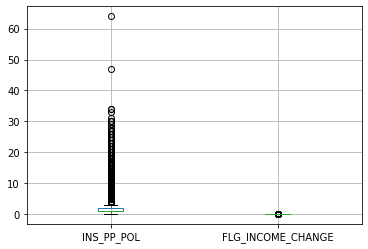

In [193]:
df_train2[['INS_PP_POL','FLG_INCOME_CHANGE']].boxplot()

<AxesSubplot:>

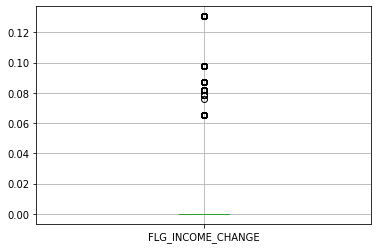

In [195]:
df_train2[['FLG_INCOME_CHANGE']].boxplot()

In [40]:
X = df_train2[['INS_NON_ACUTE', 'INS_CLM_MAJOR','INS_AGE','INS_RECENCY',
       'INS_ACUTE_CT_6', 'INS_PAID_AMT_ACUTE_6', 'INS_ACCIDENT_CT_6',#'NO_OF_CHILD',
       'INS_PAID_AMT_ACCIDENT_6', 'INS_INT_CALL_3M', 'INS_KID_CT',
       'INS_SMOKER_IND', 'INS_LAPSE_12M', 'INS_SUR_POL_12M', 'INS_PP_POL',
       'INS_ETI_RPU', 'INS_POL_APL_PH', 'INS_POL_LOAN_IND',
       'INS_LATE_PAYMENT_3M', 'INS_LATE_PAYMENT_12M', 
       'INS_BILL_AMT', 'INS_BAD_RISK', 'INS_BAD_RISK_CT_24',
       'INS_PAID_AMT_BAD_RISK', 'INS_PAID_AMT_BAD_RISK_24', 'INS_CS_BAD_RISK',
       'INS_CS_BAD_RISK_CT_24', 'VIT_ACT_3M', 'INS_INT_EMAIL_3M',
       'INS_INT_MYAIA_TRAN_3M','INS_LIFE_STAGE_Established Family',
       'INS_LIFE_STAGE_Golden Ager', 'INS_LIFE_STAGE_Mature Couple',
       'INS_LIFE_STAGE_Mature Single', 'INS_LIFE_STAGE_Minors ',
       'INS_LIFE_STAGE_Nest Builder', 'INS_LIFE_STAGE_Young Couple',
       'INS_LIFE_STAGE_Young Single',
       'INS_INCOME_SEGM_G10 Mass Affluent',
       'INS_INCOME_SEGM_G11 Mass Affluent',
       'INS_INCOME_SEGM_G12 Mass Affluent',
       'INS_INCOME_SEGM_G13 Mass Affluent', 'INS_INCOME_SEGM_G14 ENHW/HNW',
       'INS_INCOME_SEGM_G2 Mass', 'INS_INCOME_SEGM_G3 Mass',
       'INS_INCOME_SEGM_G4 Mass', 'INS_INCOME_SEGM_G5 Mass Affluent',
       'INS_INCOME_SEGM_G6 Mass Affluent', 'INS_INCOME_SEGM_G7 Mass Affluent',
       'INS_INCOME_SEGM_G8 Mass Affluent', 'INS_INCOME_SEGM_G9 Mass Affluent',
               
#         'INS_L_AGT_SEGM_150K - 300K',
#         'INS_L_AGT_SEGM_300K - 450K',
#         'INS_L_AGT_SEGM_30K - 80K',
#         'INS_L_AGT_SEGM_450K - 600K',
#         'INS_L_AGT_SEGM_80K - 150K',
#         'INS_L_AGT_SEGM_Less Than 30K',
#         'INS_L_AGT_SEGM_More Than 600K',
#         'Recency_Cat_p10r',
#         'Recency_Cat_p20_r',
#         'Recency_Cat_p30_r',
#         'Recency_Cat_p40_r',
#         'Recency_Cat_p50_r',
#         'Recency_Cat_p60_r',
#         'Recency_Cat_p70_r',
#         'Recency_Cat_p80_r',
#         'Recency_Cat_p90_r',
#         'Recency_Cat_p100_r',
#         'PP_Cat_p1_pp',
#         'PP_Cat_p2_pp',
#         'PP_Cat_p3_pp',
#         'PP_Cat_p5_pp',
#         'PP_Cat_p10_pp',
#         'PP_Cat_p15_pp',
#         'PP_Cat_p20_pp',
        'AP_Cat_p25_ap',
        'AP_Cat_p50_ap',
        'AP_Cat_p75_ap',
        'AP_Cat_p1_ap']]
y = df_train2['TARGET_REPUR_IND']

In [41]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X,y)

RandomForestClassifier()

In [42]:
from sklearn.metrics import accuracy_score
model.score(X, y)

0.9908140574017499

In [43]:
importance = model.feature_importances_
feat_df = pd.DataFrame({"Features":pd.DataFrame(X).columns,"Importances":importance})
feat_df.set_index('Importances')
feat_df = feat_df.sort_values("Importances",ascending=False)

<AxesSubplot:xlabel='Features'>

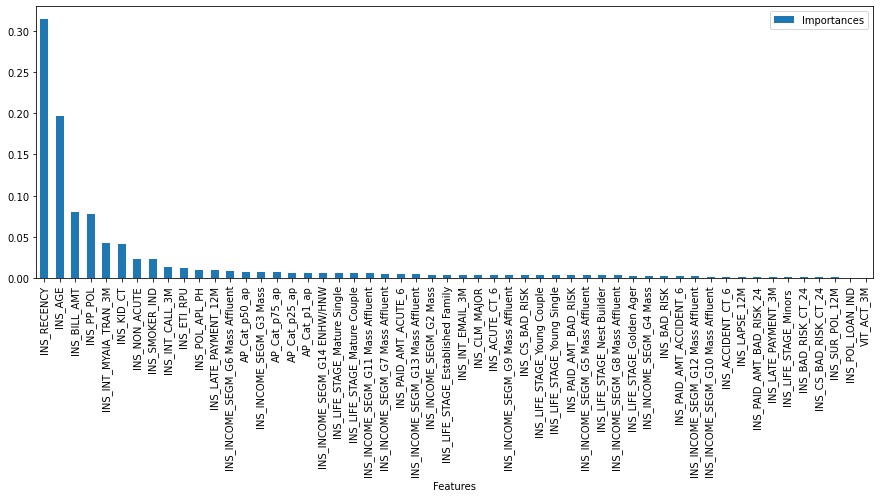

In [44]:
feat_df.plot(kind='bar',x='Features',y='Importances',figsize=(15,5))

In [45]:
#Training features from features importance
features = feat_df.Features[:-2]
list(features)

['INS_RECENCY',
 'INS_AGE',
 'INS_BILL_AMT',
 'INS_PP_POL',
 'INS_INT_MYAIA_TRAN_3M',
 'INS_KID_CT',
 'INS_NON_ACUTE',
 'INS_SMOKER_IND',
 'INS_INT_CALL_3M',
 'INS_ETI_RPU',
 'INS_POL_APL_PH',
 'INS_LATE_PAYMENT_12M',
 'INS_INCOME_SEGM_G6 Mass Affluent',
 'AP_Cat_p50_ap',
 'INS_INCOME_SEGM_G3 Mass',
 'AP_Cat_p75_ap',
 'AP_Cat_p25_ap',
 'AP_Cat_p1_ap',
 'INS_INCOME_SEGM_G14 ENHW/HNW',
 'INS_LIFE_STAGE_Mature Single',
 'INS_LIFE_STAGE_Mature Couple',
 'INS_INCOME_SEGM_G11 Mass Affluent',
 'INS_INCOME_SEGM_G7 Mass Affluent',
 'INS_PAID_AMT_ACUTE_6',
 'INS_INCOME_SEGM_G13 Mass Affluent',
 'INS_INCOME_SEGM_G2 Mass',
 'INS_LIFE_STAGE_Established Family',
 'INS_INT_EMAIL_3M',
 'INS_CLM_MAJOR',
 'INS_ACUTE_CT_6',
 'INS_INCOME_SEGM_G9 Mass Affluent',
 'INS_CS_BAD_RISK',
 'INS_LIFE_STAGE_Young Couple',
 'INS_LIFE_STAGE_Young Single',
 'INS_PAID_AMT_BAD_RISK',
 'INS_INCOME_SEGM_G5 Mass Affluent',
 'INS_LIFE_STAGE_Nest Builder',
 'INS_INCOME_SEGM_G8 Mass Affluent',
 'INS_LIFE_STAGE_Golden Ager',
 

In [46]:
#interactions_scaled = pd.concat([df_train2['INS_ID'],interactions],axis=1)
interactions

,FLG_AGE_21,FLG_MARRIED,FLG_LIFE_STAGE,FLG_CHILD,FLG_INCOME_CHANGE,FLG_BIRTHDAY,FLG_CLM_TRIGGER,FLG_CLM_FAM_TRIGGER,FLG_CALL_TRIGGER,FLG_MATURING,FLG_MATURED
0,0.0000,0.0000,0.0000,0.0479,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0479,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0373,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0423,0.0000,0.0000,0.0000
4,0.0000,0.0830,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
144729,0.0000,0.0000,0.0000,0.0000,0.0000,0.0224,0.0000,0.0000,0.0000,0.0281,0.0000
144730,0.0000,0.0000,0.0000,0.0000,0.0000,0.0224,0.0000,0.0000,0.0000,0.0281,0.0000
144731,0.0000,0.0000,0.0000,0.0000,0.0000,0.0224,0.0000,0.0423,0.0000,0.0000,0.0000
144732,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0423,0.0000,0.0000,0.0000


In [47]:
interactions_scaled = pd.concat([df_train2['INS_ID'],interactions],axis=1)
interactions_scaled.head()

,INS_ID,FLG_AGE_21,FLG_MARRIED,FLG_LIFE_STAGE,FLG_CHILD,FLG_INCOME_CHANGE,FLG_BIRTHDAY,FLG_CLM_TRIGGER,FLG_CLM_FAM_TRIGGER,FLG_CALL_TRIGGER,FLG_MATURING,FLG_MATURED
0,187555,0.0000,0.0000,0.0000,0.0479,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,528553,0.0000,0.0000,0.0000,0.0479,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,11869794,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0373,0.0000,0.0000
3,4958003,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0423,0.0000,0.0000,0.0000
4,6604238,0.0000,0.0830,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [48]:
customer_features = df_train2[features]

In [49]:
#customer_features['Above_21'] = abs(customer_features['INS_AGE'] - 21)

In [50]:
df_train.INS_LIFE_STAGE.unique()

array(['Established Family', 'Mature Couple', 'Nest Builder',
       'Mature Single', 'Golden Ager', 'Young Couple', 'Young Single',
       'Minors '], dtype=object)

In [51]:
def above_21(x):
    y = x-21
    if y > 0:
        y = y+100
    else:
        y = abs(y)
    return y

def marital_age(x,y,z):
    i = abs(x-35)
    if y == 'Mature Single' or y == 'Young Single':
        j = i
    else:
        j = x *2 # 0
    
    if y == 'Minors ':
        j = x + 100
            
    return j

In [52]:
customer_features['Above_21'] = customer_features['INS_AGE'].apply(lambda x: above_21(x))

<ipython-input-52-fa77d0c24f6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_features['Above_21'] = customer_features['INS_AGE'].apply(lambda x: above_21(x))


In [53]:
customer_features['Not_Married_Before'] = np.vectorize(marital_age) \
                                          (customer_features['INS_AGE'],df_train['INS_LIFE_STAGE'], \
                                           customer_features['Above_21'])

<ipython-input-53-e72357ad303b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_features['Not_Married_Before'] = np.vectorize(marital_age) \


In [54]:
#customer_features = pd.concat([df_train2['INS_ID'],customer_features, df_flags],axis=1)
customer_features = pd.concat([df_train2['INS_ID'],customer_features],axis=1)

In [55]:
customer_features_copy = customer_features.copy()

In [89]:
#customer_features.drop('INS_KID_CT',axis=1,inplace=True)
#customer_features.drop('INS_AGE',axis=1,inplace=True)

In [90]:
#customer_features_copy = customer_features.copy()

In [56]:
#customer_features = df_train2[final_df.Features[:10]]
customer_features.head(10)

,INS_ID,INS_RECENCY,INS_AGE,INS_BILL_AMT,INS_PP_POL,INS_INT_MYAIA_TRAN_3M,INS_KID_CT,INS_NON_ACUTE,INS_SMOKER_IND,INS_INT_CALL_3M,...,INS_ACCIDENT_CT_6,INS_LAPSE_12M,INS_PAID_AMT_BAD_RISK_24,INS_LATE_PAYMENT_3M,INS_LIFE_STAGE_Minors,INS_BAD_RISK_CT_24,INS_CS_BAD_RISK_CT_24,INS_SUR_POL_12M,Above_21,Not_Married_Before
0,187555,0,42.0000,0.0000,4,4,4,0,1,4,...,0,0,0.0000,0,0,0,0,0,121.0000,84.0000
1,528553,42,42.0000,0.0000,1,0,3,0,1,0,...,0,0,0.0000,0,0,0,0,0,121.0000,84.0000
2,11869794,58,42.0000,0.0000,0,0,0,0,0,0,...,0,0,0.0000,0,0,0,0,0,121.0000,84.0000
3,4958003,48,42.0000,0.0000,2,0,0,0,1,0,...,0,0,0.0000,0,0,0,0,0,121.0000,84.0000
4,6604238,0,42.0000,5746.9000,2,0,2,3,1,0,...,0,0,0.0000,0,0,0,0,0,121.0000,84.0000
5,4621084,5,42.0000,0.0000,3,1,1,0,0,0,...,0,0,0.0000,0,0,0,0,0,121.0000,84.0000
6,263329,55,42.0000,0.0000,4,0,4,0,1,0,...,0,0,0.0000,0,0,0,0,0,121.0000,84.0000
7,2582997,34,42.0000,0.0000,1,0,3,0,0,0,...,0,0,0.0000,0,0,0,0,0,121.0000,84.0000
8,1932423,2,42.0000,11985.8600,2,0,2,1,0,0,...,0,0,0.0000,0,0,0,0,0,121.0000,84.0000
9,3193286,21,42.0000,3831.3500,3,3,1,3,1,0,...,0,0,0.0000,0,0,0,0,0,121.0000,84.0000


In [57]:
customer_features.shape[1]

55

In [58]:
# No. of flags
item_category = interactions
item_category.shape

(144351, 11)

In [59]:
#create sparse matrix for training XXXXX
interaction_f = sparse.coo_matrix(interactions_scaled.iloc[:,1:])
interaction_f1 = sparse.coo_matrix(interactions_scaled.iloc[:,1:])

user_f  = sparse.coo_matrix(customer_features.iloc[:,1:]) 
user_f1  = sparse.coo_matrix(customer_features.iloc[:,1:]) 

#item_f  = sparse.coo_matrix(df_flags.iloc[:-valid_cutoff,:])
item_f  = sparse.identity(item_category.shape[1])

In [97]:
#create sparse matrix for training
interaction_inv = sparse.coo_matrix(interaction_inv)
interaction_f = sparse.coo_matrix(interactions)

user_f  = sparse.coo_matrix(customer_features.iloc[:,1:]) 
#user_f1  = sparse.coo_matrix(customer_features.iloc[:,1:]) 

#item_f  = sparse.coo_matrix(df_flags.iloc[:-valid_cutoff,:])
item_f  = sparse.identity(item_category.shape[1])

In [61]:
#interaction_f = interaction_f2.multiply(interaction_f2 > 0.02)

In [62]:
#interaction_f = sparse.coo_matrix(interactions_scaled.iloc[:,1:])
#interaction_f1 = sparse.coo_matrix(interactions_scaled.iloc[9900:,:])

#user_f  = sparse.coo_matrix(customer_features.iloc[:,1:]) 
#user_f1  = sparse.coo_matrix(customer_features.iloc[9900:,:]) 

#item_f  = sparse.coo_matrix(item_category_scaled)
#item_f  = sparse.identity(item_category_scaled.shape[1])

In [98]:
interaction_f

<144351x11 sparse matrix of type '<class 'numpy.float64'>'
	with 203783 stored elements in COOrdinate format>

In [99]:
interaction_inv

<144351x11 sparse matrix of type '<class 'numpy.float64'>'
	with 203783 stored elements in COOrdinate format>

In [100]:
user_f

<144351x54 sparse matrix of type '<class 'numpy.float64'>'
	with 1277402 stored elements in COOrdinate format>

In [101]:
#user_f1

In [102]:
item_f

<11x11 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements (1 diagonals) in DIAgonal format>

In [103]:
matrix_size = interaction_f.shape[0]*interaction_f.shape[1] # Number of possible interactions in the matrix
num_flags = len(interaction_f.nonzero()[0]) # Number of items interacted with
sparsity = 100*(1 - (num_flags/matrix_size))
sparsity

87.16619401824215

In [104]:
#For collaborative filtering to work, the maximum sparsity you could get away with would probably 
#be about 99.5% or so. We are well below this, so we should be able to get decent results.

### TensorREC

In [105]:
def interaction_masking(interactions):
    '''
    This function will "mask" (a.k.a "hide") 20% of original interactions
    Masked items wil be considered not repurchased

    '''
    mask_size = len(interactions.data)
    mask = np.random.choice(a=[False, True], size=mask_size, p=[.2, .8])
    not_mask = np.invert(mask)

    train_interactions = sparse.coo_matrix((interactions.data[mask],
                                        (interactions.row[mask],
                                         interactions.col[mask])),
                                       shape=interactions.shape)

    test_interactions = sparse.coo_matrix((interactions.data[not_mask],
                                       (interactions.row[not_mask],
                                        interactions.col[not_mask])),
                                      shape=interactions.shape)

    return train_interactions, test_interactions

In [106]:
# Split train / test > 80:20
np.random.seed(101) # 42 81/80 ; 0,0,4000
mask_size = len(interaction_f.data)

### use numpy.random.choice to generate a random True/False array, where False denotes the "masked" interactions (hidden)
## https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html
np.random.choice(a=[False, True], 
                 size=mask_size, 
                 p=[.2, .8])

array([ True,  True, False, ...,  True, False,  True])

In [108]:
# Create a masked train and test dataset of the interaction features
train_interactions2, test_interactions2 = interaction_masking(interaction_f)
train_interaction_inv1, test_interaction_inv1 = interaction_masking(interaction_inv)

# Feed the user and item features
user_features  = user_f
#user_features1  = user_f1
item_features = item_f

In [109]:
train_interactions1 = train_interactions2.multiply(train_interactions2 > 0.045) #0.0225
train_interaction_inv = train_interaction_inv1.multiply(train_interaction_inv1 > 0.1265) #0.089543

In [110]:
train_interactions1

<144351x11 sparse matrix of type '<class 'numpy.float64'>'
	with 59021 stored elements in Compressed Sparse Row format>

In [111]:
test_interactions1 = test_interactions2.multiply(test_interactions2 > 0.045)
test_interaction_inv = test_interaction_inv1.multiply(test_interaction_inv1 > 0.1265) # 0.089543

In [112]:
test_interactions1

<144351x11 sparse matrix of type '<class 'numpy.float64'>'
	with 14728 stored elements in Compressed Sparse Row format>

In [113]:
import tensorflow as tf
import representation_graphs
import loss_graphs
from errors import (
    ModelNotBiasedException, ModelNotFitException, ModelWithoutAttentionException, BatchNonSparseInputException,
    TfVersionException
)
from input_utils import create_tensorrec_iterator, get_dimensions_from_tensorrec_dataset
from loss_graphs import AbstractLossGraph, RMSELossGraph, WMRBLossGraph, BalancedWMRBLossGraph
from prediction_graphs import AbstractPredictionGraph, DotProductPredictionGraph
from recommendation_graphs import (
    project_biases, split_sparse_tensor_indices, bias_prediction_dense, bias_prediction_serial, rank_predictions,
    densify_sampled_item_predictions, collapse_mixture_of_tastes, predict_similar_items
)
from representation_graphs import AbstractRepresentationGraph, LinearRepresentationGraph, ReLURepresentationGraph
from representation_graphs import NormalizedLinearRepresentationGraph, FeaturePassThroughRepresentationGraph
from session_management import get_session
#from util import sample_items, calculate_batched_alpha, datasets_from_raw_input
from tensorrec import TensorRec
#import optuna

In [278]:
from eval import recall_at_k
from eval import precision_at_k
from eval import ndcg_at_k

def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-3, 1e-1)
    n_components = customer_features.shape[1] - 1 #trial.suggest_int('n_components',55,80)
    learning_rate = trial.suggest_loguniform('learning_rate',0.001,0.3)
    epochs = trial.suggest_int('epochs',80,150)
    loss = trial.suggest_categorical('loss', ['rmse','balance','wmrb'])
    relu = trial.suggest_categorical('relu', [False,True])
    inv = trial.suggest_categorical('inv', [False,True])
    
    
#n_components =  44 ## 45 play around with this number to achieve an optimal learning curve

    verbose = True
    #learning_rate = 0.01
    n_sampled_items = int(item_features.shape[0] * .1)
    biased = False
    
## Approximation of WMRB: Learning to Rank in a Scalable Batch Training Approach .
### Interactions can be any positive values, but magnitude is ignored. Negative interactions are ignored
### http://ceur-ws.org/Vol-1905/recsys2017_poster3.pdf
#  Options: BalancedWMRBLossGraph,RMSELossGraph, RMSEDenseLossGraph, SeparationDenseLossGraph
    if loss == 'wmrb':
        loss_graph = WMRBLossGraph()
        
    elif loss == 'rmse':
        loss_graph = RMSELossGraph()
        
    else: # loss_graph == 'rmse':
        loss_graph = BalancedWMRBLossGraph()
        
        
    if relu == True:
        user_repr_graph = LinearRepresentationGraph() #ReLURepresentationGraph()
        
    if relu == False:
        #user_repr_graph = NormalizedLinearRepresentationGraph()
        user_repr_graph = LinearRepresentationGraph()
        #n_components =  customer_features.shape[1] - 1
        
    if inv == True:
        train_interactions = train_interaction_inv
        test_interactions = test_interaction_inv
        
    if inv == False:
        #train_interactions = train_interactions1
        #test_interactions = test_interactions1
        train_interactions = train_interaction_inv
        test_interactions = test_interaction_inv
        
    model = TensorRec(n_components = n_components,                 
                  #user_repr_graph = representation_graphs.FeaturePassThroughRepresentationGraph(),
                  #user_repr_graph = representation_graphs.ReLURepresentationGraph(), # 0.78
                  user_repr_graph = user_repr_graph, # 0.78
                  #user_repr_graph = user_repr_graph, #0.81:38, 0.83:40
                  item_repr_graph = LinearRepresentationGraph(),
                  loss_graph = loss_graph, 
                  biased=biased)
    
    model.fit(train_interactions, 
          user_features, 
          item_features, 
          epochs=epochs, 
          verbose=True, 
          alpha=alpha, 
          n_sampled_items=n_sampled_items,
          learning_rate=learning_rate)
    
    predicted_ranks = model.predict_rank(user_features=user_features,
                                     item_features=item_features)
    
    #p_at_k_test = precision_at_k(predicted_ranks, test_interactions, k=3) #80
    #p_at_k_train = precision_at_k(predicted_ranks, train_interactions, k=3) #80
    ndcg_at_k_test = ndcg_at_k(predicted_ranks, test_interactions, k=3) #80
    #print("Recall at @k: Train: {:.2f} Test: {:.2f}".format(p_at_k_train.mean(), p_at_k_test.mean()))
    
    return ndcg_at_k_test.mean()

                       

In [822]:
10.30

120.0

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, timeout=3600) #n_trials=100)

In [167]:
# Best so far - 0.55709 with recency = 4
trial = study.best_trial
print('NDCG at K: {}'.format(trial.value))  

print("Best hyperparameters: {}".format(trial.params))

NDCG at K: 0.5234927164663711


In [169]:
if trial.params['inv'] == True:
        train_interactions = train_interaction_inv
        test_interactions = test_interaction_inv
else:
    #trial.params['inv'] == False:
    train_interactions = train_interactions1
    test_interactions = test_interactions1
#print(train_interactions)

if trial.params['loss'] == 'wmrb':
    loss_graph = WMRBLossGraph()
elif  trial.params['loss'] == 'rmse':
    loss_graph = RMSELossGraph()
else:
    loss_graph = BalancedWMRBLossGraph()
print(loss_graph)

In [170]:
#t = WMRBLossGraph
# f = NormalizedLinearRepresentationGraph

alpha = trial.params['alpha'] 
n_components = customer_features.shape[1] - 1 #trial.params['n_components']
learning_rate = trial.params['learning_rate']
epochs = trial.params['epochs']
verbose = True
    #learning_rate = 0.01
n_sampled_items = int(item_features.shape[0] * .1)
biased = False

model = TensorRec(n_components = n_components,                 
                  #user_repr_graph = representation_graphs.FeaturePassThroughRepresentationGraph(),
                  user_repr_graph = LinearRepresentationGraph(), #NormalizedLinearRepresentationGraph(), #ReLURepresentationGraph(), # 0.78
                  #user_repr_graph = user_repr_graph, #0.81:38, 0.83:40
                  item_repr_graph = LinearRepresentationGraph(),
                  loss_graph = loss_graph, #AbstractLossGraph, RMSELossGraph,WMRBLossGraph,BalancedWMRBLossGraph
                  biased=biased)

model.fit(train_interactions, 
          user_features, 
          item_features, 
          epochs=epochs, 
          verbose=True, 
          alpha=alpha, 
          n_sampled_items=n_sampled_items,
          learning_rate=learning_rate)

Loss:  Tensor("Log_13:0", dtype=float32)


C:\Users\I008328\.conda\envs\kw-py37\lib\site-packages\tensorflow\python\framework\indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


### Single Model

In [106]:
print("Best hyperparameters: {}".format(trial.params))

Best hyperparameters: {'alpha': 0.001000975355920375, 'learning_rate': 0.0375694321478341, 'epochs': 103, 'loss': 'wmrb', 'relu': False, 'inv': False}


In [280]:
from eval import recall_at_k
from eval import precision_at_k
from eval import ndcg_at_k

def objective(trial):
    alpha = trial.suggest_loguniform('alpha',0.005,0.05)
    n_components = customer_features.shape[1] - 1 #trial.suggest_int('n_components',55,80)
    learning_rate = trial.suggest_loguniform('learning_rate',0.005,0.02)
    epochs = trial.suggest_int('epochs',80,120)
    
    
    
#n_components =  44 ## 45 play around with this number to achieve an optimal learning curve

    verbose = True
    #learning_rate = 0.01
    n_sampled_items = int(item_features.shape[0] * .1)
    biased = False
    k_val  = 100
    train_interactions = train_interaction_inv
    test_interactions = test_interaction_inv
    
## Approximation of WMRB: Learning to Rank in a Scalable Batch Training Approach .
### Interactions can be any positive values, but magnitude is ignored. Negative interactions are ignored
### http://ceur-ws.org/Vol-1905/recsys2017_poster3.pdf
#  Options: BalancedWMRBLossGraph,RMSELossGraph, RMSEDenseLossGraph, SeparationDenseLossGraph
    
        
    model = TensorRec(n_components = n_components,                 
                  #user_repr_graph = representation_graphs.FeaturePassThroughRepresentationGraph(),
                  #user_repr_graph = representation_graphs.ReLURepresentationGraph(), # 0.78
                  user_repr_graph = LinearRepresentationGraph(), # 0.78
                  #user_repr_graph = user_repr_graph, #0.81:38, 0.83:40
                  item_repr_graph = LinearRepresentationGraph(),
                  loss_graph = loss_graphs.WMRBLossGraph(), 
                  biased=biased)
    
    model.fit(train_interactions, 
          user_features, 
          item_features, 
          epochs=epochs, 
          verbose=True, 
          alpha=alpha, 
          n_sampled_items=n_sampled_items,
          learning_rate=learning_rate)
    
    predicted_ranks = model.predict_rank(user_features=user_features,
                                     item_features=item_features)
    
    #p_at_k_test = precision_at_k(predicted_ranks, test_interactions, k=3) #80
    #p_at_k_train = precision_at_k(predicted_ranks, train_interactions, k=3) #80
    ndcg_at_k_test = ndcg_at_k(predicted_ranks, test_interactions, k=3) #80
    #print("Recall at @k: Train: {:.2f} Test: {:.2f}".format(p_at_k_train.mean(), p_at_k_test.mean()))
    
    return ndcg_at_k_test.mean()

                       

In [ ]:
11.50

In [281]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, timeout=1800) #n_trials=100)

[I 2021-09-10 11:17:59,588] A new study created in memory with name: no-name-d28a06c0-d8c6-43cb-8757-d4b89533eb15


Loss:  Tensor("Log_21:0", dtype=float32)


C:\Users\I008328\.conda\envs\kw-py37\lib\site-packages\tensorflow\python\framework\indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
D:\Users\I008328\NRA TensorRec\tensorrec\eval.py:111: RuntimeWarning: invalid value encountered in true_divide
  ndcg = dcg/idcg
[I 2021-09-10 11:24:56,817] Trial 0 finished with value: 0.5152594404831482 and parameters: {'alpha': 0.013585831718449393, 'learning_rate': 0.012799937654179, 'epochs': 104}. Best is trial 0 with value: 0.5152594404831482.


Loss:  Tensor("Log_22:0", dtype=float32)


C:\Users\I008328\.conda\envs\kw-py37\lib\site-packages\tensorflow\python\framework\indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
D:\Users\I008328\NRA TensorRec\tensorrec\eval.py:111: RuntimeWarning: invalid value encountered in true_divide
  ndcg = dcg/idcg
[I 2021-09-10 11:31:37,132] Trial 1 finished with value: 0.4787345792900397 and parameters: {'alpha': 0.047191397491431177, 'learning_rate': 0.010482922628545551, 'epochs': 99}. Best is trial 0 with value: 0.5152594404831482.


Loss:  Tensor("Log_23:0", dtype=float32)


C:\Users\I008328\.conda\envs\kw-py37\lib\site-packages\tensorflow\python\framework\indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
D:\Users\I008328\NRA TensorRec\tensorrec\eval.py:111: RuntimeWarning: invalid value encountered in true_divide
  ndcg = dcg/idcg
[I 2021-09-10 11:38:15,261] Trial 2 finished with value: 0.4941134856770088 and parameters: {'alpha': 0.011760192159566238, 'learning_rate': 0.007447037276021591, 'epochs': 97}. Best is trial 0 with value: 0.5152594404831482.


Loss:  Tensor("Log_24:0", dtype=float32)


C:\Users\I008328\.conda\envs\kw-py37\lib\site-packages\tensorflow\python\framework\indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
D:\Users\I008328\NRA TensorRec\tensorrec\eval.py:111: RuntimeWarning: invalid value encountered in true_divide
  ndcg = dcg/idcg
[I 2021-09-10 11:44:37,869] Trial 3 finished with value: 0.4954580053233328 and parameters: {'alpha': 0.04102079547046777, 'learning_rate': 0.012952961420301393, 'epochs': 93}. Best is trial 0 with value: 0.5152594404831482.


Loss:  Tensor("Log_25:0", dtype=float32)


C:\Users\I008328\.conda\envs\kw-py37\lib\site-packages\tensorflow\python\framework\indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
D:\Users\I008328\NRA TensorRec\tensorrec\eval.py:111: RuntimeWarning: invalid value encountered in true_divide
  ndcg = dcg/idcg
[I 2021-09-10 11:51:32,997] Trial 4 finished with value: 0.49455639279248065 and parameters: {'alpha': 0.0454358720103347, 'learning_rate': 0.006840642776861748, 'epochs': 102}. Best is trial 0 with value: 0.5152594404831482.


In [282]:
# Best so far - 0.55709 with recency = 4
trial = study.best_trial
print('NDCG at K: {}'.format(trial.value))  

NDCG at K: 0.5152594404831482


In [283]:
print("Best hyperparameters: {}".format(trial.params))

Best hyperparameters: {'alpha': 0.013585831718449393, 'learning_rate': 0.012799937654179, 'epochs': 104}


In [292]:
%%time
alpha = 0.01358 # trial.params['alpha'] 
n_components = customer_features.shape[1] - 1 #trial.params['n_components']
learning_rate = 0.012799 # trial.params['learning_rate']
epochs = 104 #trial.params['epochs']
verbose = True
    #learning_rate = 0.01
n_sampled_items = int(item_features.shape[0] * .1)
biased = False
k_val  = 100

#train_interactions = train_interactions1
#test_interactions = test_interactions1
train_interactions = train_interaction_inv
test_interactions = test_interaction_inv

model = TensorRec(n_components = n_components,                 
                  #user_repr_graph = representation_graphs.FeaturePassThroughRepresentationGraph(),
                  user_repr_graph = LinearRepresentationGraph(), #NormalizedLinearRepresentationGraph(), #ReLURepresentationGraph(), # 0.78
                  #user_repr_graph = user_repr_graph, #0.81:38, 0.83:40
                  item_repr_graph = LinearRepresentationGraph(),
                  loss_graph = loss_graphs.WMRBLossGraph(), #AbstractLossGraph, RMSELossGraph,WMRBLossGraph,BalancedWMRBLossGraph
                  biased=biased)

model.fit(train_interactions, 
          user_features, 
          item_features, 
          epochs=epochs, 
          verbose=True, 
          alpha=alpha, 
          n_sampled_items=n_sampled_items,
          learning_rate=learning_rate)

Loss:  Tensor("Log_27:0", dtype=float32)


C:\Users\I008328\.conda\envs\kw-py37\lib\site-packages\tensorflow\python\framework\indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Wall time: 6min 49s


In [131]:
%%time
# Best = 0.52 - very good 21 and married, INS_PP_POL, inv
epochs = 100 #100 number of iterations ## play around with this number to achieve an optimal learning curve
alpha = 0.01 #0.01 
n_components =  customer_features.shape[1] - 1 #59 ## 45 play around with this number to achieve an optimal learning curve
verbose = True
learning_rate = 0.011 # 0.01
n_sampled_items = int(item_features.shape[0] * .1)
biased = False
k_val  = 100

train_interactions = train_interactions1
test_interactions = test_interactions1
#train_interactions = train_interaction_inv
#test_interactions = test_interaction_inv

## Approximation of WMRB: Learning to Rank in a Scalable Batch Training Approach .
### Interactions can be any positive values, but magnitude is ignored. Negative interactions are ignored
### http://ceur-ws.org/Vol-1905/recsys2017_poster3.pdf
#  Options: BalancedWMRBLossGraph,RMSELossGraph, RMSEDenseLossGraph, SeparationDenseLossGraph

model = TensorRec(n_components = n_components,                 
                  #user_repr_graph = representation_graphs.FeaturePassThroughRepresentationGraph(),
                  #user_repr_graph = representation_graphs.ReLURepresentationGraph(), # 0.78
                  user_repr_graph = representation_graphs.LinearRepresentationGraph(), #0.81:38, 0.83:40
                   item_repr_graph = representation_graphs.LinearRepresentationGraph(),
                   loss_graph = loss_graphs.WMRBLossGraph(), 
                  biased=biased)

model.fit(train_interactions, 
          user_features, 
          item_features, 
          epochs=epochs, 
          verbose=True, 
          alpha=alpha, 
          n_sampled_items=n_sampled_items,
          learning_rate=learning_rate)


Loss:  Tensor("Log_2:0", dtype=float32)


C:\Users\Wai\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Wall time: 9min 46s


In [132]:
# Get the predicted rankings (First, second, third, and so forth...) for all users and all flags
predicted_ranks = model.predict_rank(user_features=user_features,
                                     item_features=item_features)

In [133]:
predicted = model.predict(user_features=user_features,
                                     item_features=item_features)

In [134]:
len(predicted_ranks)

144351

In [135]:
%%time
from eval import recall_at_k
### Recall at @k: Train: 0.66 Test: 0.65

# we use Recall@k
# Recall@k: for the average user, what percentage of their test items made it in to the top k in the predicted rankings

# in other words, recall@k:
# what percentage of the positively interacted items (repurchased) were in the top k results of the prediction?

# in simpler words:
# Recall@k = (# of recommended items @k that are relevant) / (total # of relevant items)
#a.k.a
# Recall@k = (# of recommended items @k ) / (total # items purchased)

r_at_k_test = recall_at_k(predicted_ranks, test_interactions, k=3) #80
r_at_k_train = recall_at_k(predicted_ranks, train_interactions, k=3) #80
print("Recall at @k: Train: {:.2f} Test: {:.2f}".format(r_at_k_train.mean(), r_at_k_test.mean()))

Recall at @k: Train: 0.88 Test: 0.89
Wall time: 37.9 ms


In [136]:
%%time
# Recall at @k: Train: 0.26 Test: 0.23
from eval import precision_at_k

p_at_k_test = precision_at_k(predicted_ranks, test_interactions, k=3) #80
p_at_k_train = precision_at_k(predicted_ranks, train_interactions, k=3) #80
print("Recall at @k: Train: {:.2f} Test: {:.2f}".format(p_at_k_train.mean(), p_at_k_test.mean()))

Recall at @k: Train: 0.34 Test: 0.31
Wall time: 38.9 ms


In [137]:
%%time
from eval import ndcg_at_k
### NDCG at @k: Train: 0.51 Test: 0.49

ndcg_at_k_test = ndcg_at_k(predicted_ranks, test_interactions, k=3) #80
ndcg_at_k_train = ndcg_at_k(predicted_ranks, train_interactions, k=3) #80
print("NDCG at @k: Train: {:.3f} Test: {:.3f}".format(ndcg_at_k_train.mean(), ndcg_at_k_test.mean()))

C:\Users\Wai\OneDrive\Desktop\insurance\tensorrec\eval.py:111: RuntimeWarning: invalid value encountered in true_divide
  ndcg = dcg/idcg


NDCG at @k: Train: 0.744 Test: 0.729
Wall time: 4.3 s


C:\Users\Wai\OneDrive\Desktop\insurance\tensorrec\eval.py:111: RuntimeWarning: invalid value encountered in true_divide
  ndcg = dcg/idcg


In [138]:
from eval import ndcg_at_k
### NDCG at @k: Train: 0.51 Test: 0.49

ndcg_at_k_test = ndcg_at_k(predicted_ranks, test_interactions, k=4) #80
ndcg_at_k_train = ndcg_at_k(predicted_ranks, train_interactions, k=4) #80
print("NDCG at @k: Train: {:.3f} Test: {:.3f}".format(ndcg_at_k_train.mean(), ndcg_at_k_test.mean()))

C:\Users\Wai\OneDrive\Desktop\insurance\tensorrec\eval.py:111: RuntimeWarning: invalid value encountered in true_divide
  ndcg = dcg/idcg


NDCG at @k: Train: 0.780 Test: 0.763


C:\Users\Wai\OneDrive\Desktop\insurance\tensorrec\eval.py:111: RuntimeWarning: invalid value encountered in true_divide
  ndcg = dcg/idcg


In [123]:
ndcg_at_k_test[:22]

array([0.43067656, 0.5       , 0.5       , 0.        , 1.        ,
       0.5       , 1.        , 0.5       , 0.63092975, 0.43067656,
       1.        , 0.        , 0.        , 0.        , 0.63092975,
       0.43067656, 0.63092975, 0.        , 0.63092975, 0.5       ,
       1.        , 0.        ])

In [267]:
lst

['FLG_AGE_21',
 'FLG_MARRIED',
 'FLG_LIFE_STAGE',
 'FLG_CHILD',
 'FLG_INCOME_CHANGE',
 'FLG_BIRTHDAY',
 'FLG_CLM_TRIGGER',
 'FLG_CLM_FAM_TRIGGER',
 'FLG_CALL_TRIGGER',
 'FLG_MATURING',
 'FLG_MATURED']

In [139]:
# produce the ranking into a readable table (dataframe it is)
ranks_df = pd.DataFrame(predicted_ranks)
ranks_df.columns = lst # item_category_scaled.index
ranks_df.index = df_train['INS_ID'] #customer_features.index[:-1000]
ranks_df = ranks_df.T

In [140]:
df5 = ranks_df.T
df5.head(10)

,FLG_AGE_21,FLG_MARRIED,FLG_LIFE_STAGE,FLG_CHILD,FLG_INCOME_CHANGE,FLG_BIRTHDAY,FLG_CLM_TRIGGER,FLG_CLM_FAM_TRIGGER,FLG_CALL_TRIGGER,FLG_MATURING,FLG_MATURED
INS_ID,,,,,,,,,,,
187555,11,3,4,1,2,9,10,6,5,7,8
528553,9,3,4,1,2,11,10,6,5,7,8
11869794,9,3,4,1,2,11,10,6,5,7,8
4958003,9,3,4,1,2,11,10,6,5,7,8
6604238,10,3,4,1,2,11,7,6,5,8,9
4621084,11,3,4,1,2,9,10,6,5,7,8
263329,9,3,4,1,2,11,10,6,5,7,8
2582997,9,3,4,1,2,11,10,6,5,7,8
1932423,10,3,4,1,2,11,7,6,5,8,9


In [141]:
df6 = df5[['FLG_AGE_21', 'FLG_MARRIED', 'FLG_LIFE_STAGE', 'FLG_CHILD', 'FLG_INCOME_CHANGE', 'FLG_BIRTHDAY', 'FLG_CLM_TRIGGER', 'FLG_CLM_FAM_TRIGGER', 'FLG_CALL_TRIGGER', 'FLG_MATURING', 'FLG_MATURED']].apply(pd.Series.value_counts).fillna(0)
df6

,FLG_AGE_21,FLG_MARRIED,FLG_LIFE_STAGE,FLG_CHILD,FLG_INCOME_CHANGE,FLG_BIRTHDAY,FLG_CLM_TRIGGER,FLG_CLM_FAM_TRIGGER,FLG_CALL_TRIGGER,FLG_MATURING,FLG_MATURED
1,0.0000,13.0000,4766.0000,122920.0000,16652.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,17392.0000,17451.0000,10682.0000,98622.0000,0.0000,0.0000,0.0000,204.0000,0.0000,0.0000
3,0.0000,108237.0000,2466.0000,10748.0000,18363.0000,0.0000,0.0000,0.0000,4537.0000,0.0000,0.0000
4,508.0000,15872.0000,118821.0000,1.0000,6609.0000,0.0000,0.0000,2023.0000,517.0000,0.0000,0.0000
5,1620.0000,692.0000,616.0000,0.0000,1231.0000,0.0000,51.0000,4949.0000,135037.0000,155.0000,0.0000
6,386.0000,2144.0000,95.0000,0.0000,361.0000,0.0000,189.0000,136974.0000,4051.0000,151.0000,0.0000
7,6470.0000,1.0000,126.0000,0.0000,2513.0000,113.0000,26778.0000,293.0000,5.0000,108001.0000,51.0000
8,7148.0000,0.0000,7.0000,0.0000,0.0000,750.0000,15194.0000,112.0000,0.0000,34635.0000,86505.0000
9,57331.0000,0.0000,3.0000,0.0000,0.0000,17145.0000,16516.0000,0.0000,0.0000,947.0000,52409.0000
10,54540.0000,0.0000,0.0000,0.0000,0.0000,11629.0000,73050.0000,0.0000,0.0000,25.0000,5107.0000


In [142]:
df6 = df5[['FLG_AGE_21', 'FLG_MARRIED', 'FLG_LIFE_STAGE', 'FLG_CHILD', 'FLG_INCOME_CHANGE', 'FLG_BIRTHDAY', 'FLG_CLM_TRIGGER', 'FLG_CLM_FAM_TRIGGER', 'FLG_CALL_TRIGGER', 'FLG_MATURING', 'FLG_MATURED']].apply(pd.Series.value_counts,normalize=True).fillna(0)
df6['Perc'] = df6.sum(axis=1)
df6 * 100

,FLG_AGE_21,FLG_MARRIED,FLG_LIFE_STAGE,FLG_CHILD,FLG_INCOME_CHANGE,FLG_BIRTHDAY,FLG_CLM_TRIGGER,FLG_CLM_FAM_TRIGGER,FLG_CALL_TRIGGER,FLG_MATURING,FLG_MATURED,Perc
1,0.0000,0.0090,3.3017,85.1535,11.5358,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,100.0000
2,0.0000,12.0484,12.0893,7.4000,68.3210,0.0000,0.0000,0.0000,0.1413,0.0000,0.0000,100.0000
3,0.0000,74.9818,1.7083,7.4457,12.7211,0.0000,0.0000,0.0000,3.1430,0.0000,0.0000,100.0000
4,0.3519,10.9954,82.3139,0.0007,4.5784,0.0000,0.0000,1.4014,0.3582,0.0000,0.0000,100.0000
5,1.1223,0.4794,0.4267,0.0000,0.8528,0.0000,0.0353,3.4284,93.5477,0.1074,0.0000,100.0000
6,0.2674,1.4853,0.0658,0.0000,0.2501,0.0000,0.1309,94.8895,2.8064,0.1046,0.0000,100.0000
7,4.4821,0.0007,0.0873,0.0000,1.7409,0.0783,18.5506,0.2030,0.0035,74.8183,0.0353,100.0000
8,4.9518,0.0000,0.0048,0.0000,0.0000,0.5196,10.5257,0.0776,0.0000,23.9936,59.9268,100.0000
9,39.7164,0.0000,0.0021,0.0000,0.0000,11.8773,11.4416,0.0000,0.0000,0.6560,36.3066,100.0000
10,37.7829,0.0000,0.0000,0.0000,0.0000,8.0561,50.6058,0.0000,0.0000,0.0173,3.5379,100.0000


<AxesSubplot:>

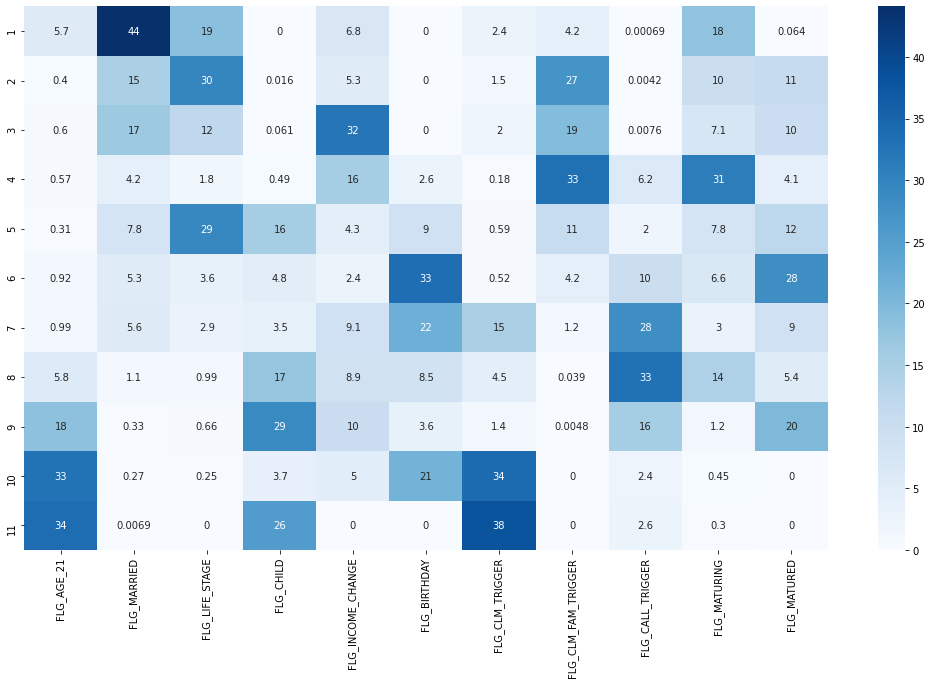

In [145]:
pd.options.display.float_format = '{:.3f}'.format
df6 = df6*100
plt.figure(figsize = (18,10))
#create heatmap
sns.heatmap(df6.iloc[:,:-1],annot=True,cmap="Blues")

In [143]:
df11 = customer_features_copy.merge(df5, on='INS_ID', how='left')
df11.shape

(144351, 66)

In [144]:
#'INS_KID_CT',
df11[['INS_AGE','INS_LIFE_STAGE_Established Family','INS_LIFE_STAGE_Nest Builder','Not_Married_Before' ,'FLG_MARRIED']].loc[df11.FLG_MARRIED ==2 ]

,INS_AGE,INS_LIFE_STAGE_Established Family,INS_LIFE_STAGE_Nest Builder,Not_Married_Before,FLG_MARRIED
13,42.0000,0,0,7.0000,2
19,42.0000,0,0,7.0000,2
21,42.0000,0,0,7.0000,2
31,42.0000,0,0,7.0000,2
36,42.0000,0,0,7.0000,2
...,...,...,...,...,...
144288,70.0000,0,0,140.0000,2
144300,70.0000,0,0,140.0000,2
144318,69.0000,0,0,138.0000,2
144325,69.0000,0,0,138.0000,2


In [145]:
df11[df11.FLG_AGE_21 <= 4]

,INS_ID,INS_RECENCY,INS_AGE,INS_BILL_AMT,INS_PP_POL,INS_INT_MYAIA_TRAN_3M,INS_KID_CT,INS_NON_ACUTE,INS_SMOKER_IND,INS_INT_CALL_3M,...,FLG_MARRIED,FLG_LIFE_STAGE,FLG_CHILD,FLG_INCOME_CHANGE,FLG_BIRTHDAY,FLG_CLM_TRIGGER,FLG_CLM_FAM_TRIGGER,FLG_CALL_TRIGGER,FLG_MATURING,FLG_MATURED
19587,11809934,251,21.0000,0.0000,1,0,0,0,0,0,...,6,1,2,7,11,10,5,3,8,9
19830,10684638,250,21.0000,0.0000,1,0,0,0,0,0,...,6,1,2,7,11,10,5,3,8,9
19874,7017978,246,21.0000,0.0000,1,0,0,0,0,0,...,6,1,2,7,11,10,5,3,8,9
19875,16670335,245,21.0000,0.0000,1,0,0,0,0,0,...,6,1,2,7,11,10,5,3,8,9
19880,17864519,238,21.0000,0.0000,1,0,0,0,0,0,...,6,1,2,7,11,10,5,3,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141591,7645156,243,21.0000,0.0000,1,0,0,0,0,0,...,6,1,2,7,11,10,5,3,8,9
141600,3679426,245,21.0000,0.0000,1,1,0,0,0,0,...,6,1,2,7,11,10,5,3,8,9
141601,14412967,247,21.0000,0.0000,1,0,0,0,0,0,...,6,1,2,7,11,10,5,3,8,9
141611,15410817,246,21.0000,0.0000,1,0,0,0,0,0,...,6,1,2,7,11,10,5,3,8,9


In [308]:
df_train.FLG_CHILD.describe()

count   144351.000000
mean         0.011689
std          0.021347
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.095800
Name: FLG_CHILD, dtype: float64

In [73]:
# Save model
#model.save_model('rec_wo_inverse') 
#model.save_model('rec_age_wo_inverse') # AGE
model.save_model('saved_models/rec_age_married_wo_inverse') # age and married

In [63]:
df7 = df_train[['INS_ID','FLG_SUM','REPURCHASE_ANP','TARGET_REPUR_IND']]
#customer_features.set_index('INS_ID',inplace=True)
interactions.index = df_train.INS_ID

In [64]:
interaction1 = df7.merge(interactions, on='INS_ID', how='left')
df9 = customer_features.merge(interaction1, on='INS_ID', how='left')
df10 = df9.merge(df5, on='INS_ID', how='left')
df10.head()

,INS_ID,INS_RECENCY,INS_AGE,INS_BILL_AMT,INS_PP_POL,INS_KID_CT,INS_INT_MYAIA_TRAN_3M,INS_NON_ACUTE,INS_PAID_AMT_ACUTE_6,INS_SMOKER_IND,...,FLG_MARRIED_y,FLG_LIFE_STAGE_y,FLG_INCOME_CHANGE_y,FLG_POL_ANNIVERSARY_1M_y,FLG_BIRTHDAY_y,FLG_CLM_TRIGGER_y,FLG_NON_ACUTE_CLM_FAM_y,FLG_ACUTE_CLM_FAM_y,FLG_ACC_CLM_FAM_y,FLG_CALL_TRIGGER_y
0,282051,23,5.0,6000.00,1,0,0,2,0.0,0,...,6,2,7,10,11,1,8,5,9,3
1,299865,20,15.0,1521.50,1,0,0,0,1521.5,0,...,7,2,4,11,10,1,8,5,9,3
2,111312,79,54.0,0.00,3,1,0,0,0.0,1,...,8,1,7,11,10,5,6,4,9,3
3,804673,77,37.0,126801.86,3,0,0,11,0.0,1,...,6,2,7,10,11,1,8,5,9,3
4,571688,24,22.0,0.00,1,0,0,0,0.0,0,...,8,1,7,11,10,5,6,4,9,3


In [65]:
customer_features.head()

,INS_ID,INS_RECENCY,INS_AGE,INS_BILL_AMT,INS_PP_POL,INS_KID_CT,INS_INT_MYAIA_TRAN_3M,INS_NON_ACUTE,INS_PAID_AMT_ACUTE_6,INS_SMOKER_IND,...,INS_PAID_AMT_BAD_RISK,INS_INCOME_SEGM_G4 Mass,INS_LIFE_STAGE_Golden Ager,INS_INCOME_SEGM_G8 Mass Affluent,INS_CS_BAD_RISK,INS_INT_EMAIL_3M,INS_INCOME_SEGM_G12 Mass Affluent,INS_BAD_RISK,INS_INCOME_SEGM_G10 Mass Affluent,INS_PAID_AMT_BAD_RISK_24
0,282051,23,5.0,6000.00,1,0,0,2,0.0,0,...,0.0,0,0,0,0,0,0,0,0,0.0
1,299865,20,15.0,1521.50,1,0,0,0,1521.5,0,...,0.0,0,0,0,0,0,0,0,0,0.0
2,111312,79,54.0,0.00,3,1,0,0,0.0,1,...,0.0,0,0,0,0,0,0,0,0,0.0
3,804673,77,37.0,126801.86,3,0,0,11,0.0,1,...,0.0,0,0,0,0,0,0,0,0,0.0
4,571688,24,22.0,0.00,1,0,0,0,0.0,0,...,0.0,0,0,0,0,0,0,0,0,0.0


In [66]:
filepath = 'D:/Users/I008328/NRA/NRA_RecSys_Files/'
df10.to_csv(filepath +'full_result.csv',index=False)
ranking = df7.merge(df5, on='INS_ID', how='left')
weighted_score = df7.merge(interactions, on='INS_ID', how='left')
train_features = df7.merge(customer_features, on='INS_ID', how='left')

In [67]:
#filepath = 'D:/Users/I008328/NRA/NRA_RecSys_Files/'
ranking.to_csv(filepath +'rankings.csv')
weighted_score.to_csv(filepath +'weighted_score.csv')
train_features.to_csv(filepath +'train_features.csv',index=False)
#df10.to_csv(filepath +'full_result.csv',index=False)